<a href="https://colab.research.google.com/github/azizamari/stock_price_prediction/blob/main/Stock_Market_Prediction_using_Numerical_and_Textual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Aziz Amari
### Project: Stock Market Prediction with a hybird (textual & Numerical) model

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 4.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

## Importing Dependencies

In [2]:
import yfinance as yf
import pandas as pd
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from pandas import DataFrame as df
from pandas import concat
import matplotlib.pyplot as plt

In [3]:
# define dates
start='2021-10-01'
end='2022-01-01'
startstamp=20211001

## Get data from yahoo finance

In [4]:
past_data = yf.download('^BSESN', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [5]:
print(past_data.columns)
past_data.head()

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-01 00:00:00+05:30,58889.769531,58890.078125,58551.140625,58765.578125,58765.578125,10200
2021-10-04 00:00:00+05:30,59143.000000,59548.820312,58952.109375,59299.320312,59299.320312,10000
2021-10-05 00:00:00+05:30,59320.140625,59778.871094,59127.039062,59744.878906,59744.878906,12900
2021-10-06 00:00:00+05:30,59942.000000,59963.570312,59079.859375,59189.730469,59189.730469,7000
2021-10-07 00:00:00+05:30,59632.808594,59914.910156,59597.058594,59677.828125,59677.828125,5700


To better understand stock data I read through this article 
[link](https://analyzingalpha.com/open-high-low-close-stocks)


In [6]:
past_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2021-10-01 00:00:00+05:30 to 2021-12-31 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       63 non-null     float64
 1   High       63 non-null     float64
 2   Low        63 non-null     float64
 3   Close      63 non-null     float64
 4   Adj Close  63 non-null     float64
 5   Volume     63 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


## Get india news headlines dataset

In [7]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d therohk/india-headlines-news-dataset

 84% 73.0M/86.6M [00:00<00:00, 178MB/s]
100% 86.6M/86.6M [00:00<00:00, 141MB/s]


In [12]:
!unzip india-headlines-news-dataset.zip

Archive:  india-headlines-news-dataset.zip
  inflating: india-news-headlines.csv  


In [13]:
cols = ['Date','News']
news_data = pd.read_csv('india-news-headlines.csv', names = cols)
news_data = news_data.dropna(axis = 0, how ='any') 
news_data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date,News
publish_date,headline_category,headline_text
20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
20010102,unknown,Fissures in Hurriyat over Pak visit
20010102,unknown,America's unwanted heading for India?
20010102,unknown,For bigwigs; it is destination Goa


### Data prep news data

In [14]:
news_data.head()

,Date,News
publish_date,headline_category,headline_text
20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
20010102,unknown,Fissures in Hurriyat over Pak visit
20010102,unknown,America's unwanted heading for India?
20010102,unknown,For bigwigs; it is destination Goa


In [15]:
news=news_data['News'].iloc[1:].values

In [16]:
dates=news_data.index[1:].values

In [17]:
news_data=pd.DataFrame(data={'date':dates,'news':news})

In [18]:
news_data.head()

,date,news
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [19]:
news_data.describe()

,date,news
count,3650970,3650970
unique,7718,3387380
top,20141215,Straight Answers
freq,706,6723


In [20]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   date    object
 1   news    object
dtypes: object(2)
memory usage: 55.7+ MB


In [21]:
news_data.isnull().sum()

date    0
news    0
dtype: int64

In [22]:
news_data.duplicated().sum()

162098

In [23]:
# drop duplicated data
news_data.drop_duplicates(keep='first', inplace=True, ignore_index=True)

In [24]:
news_data.duplicated().sum()

0

In [25]:
news_data['date'] = pd.to_numeric(news_data['date'])

In [26]:
# drop news before 2021-10-01
news_data.drop(news_data[news_data['date']<20211001].index,inplace=True)

In [27]:
# dropping data messes up indexes
news_data.reset_index(inplace = True, drop = True)

In [28]:
len(news_data)

87701

### Data prep yahoo finance data

In [29]:
past_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2021-10-01 00:00:00+05:30 to 2021-12-31 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       63 non-null     float64
 1   High       63 non-null     float64
 2   Low        63 non-null     float64
 3   Close      63 non-null     float64
 4   Adj Close  63 non-null     float64
 5   Volume     63 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 5.5 KB


In [30]:
past_data.reset_index(inplace=True)

In [31]:
past_data.rename(columns={
      'Date':'date',
      'Open': 'open',
      'High': 'high',
      'Low': 'low',
      'Close': 'close',
      'Adj Close': 'adjclose',
      'Volume': 'volume'},
      inplace = True
)

In [32]:
past_data.describe()

,open,high,low,close,adjclose,volume
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,59233.257564,59493.432602,58762.142981,59095.553447,59095.553447,9368.253968
std,1534.928686,1453.983828,1540.406671,1505.290274,1505.290274,7131.299149
min,56320.019531,56538.148438,55132.679688,55822.011719,55822.011719,1800.000000
25%,57938.128906,58236.519531,57660.949219,57800.404297,57800.404297,6450.000000
50%,59320.140625,59778.371094,58952.109375,59189.730469,59189.730469,7600.000000
75%,60327.935547,60557.830078,59956.109375,60303.339844,60303.339844,9200.000000
max,62156.480469,62245.429688,61624.648438,61765.589844,61765.589844,48400.000000


In [33]:
past_data.date=past_data.date.dt.strftime('%Y%m%d').astype(int)

In [34]:
past_data

,date,open,high,low,close,adjclose,volume
0,20211001,58889.769531,58890.078125,58551.140625,58765.578125,58765.578125,10200
1,20211004,59143.000000,59548.820312,58952.109375,59299.320312,59299.320312,10000
2,20211005,59320.140625,59778.871094,59127.039062,59744.878906,59744.878906,12900
3,20211006,59942.000000,59963.570312,59079.859375,59189.730469,59189.730469,7000
4,20211007,59632.808594,59914.910156,59597.058594,59677.828125,59677.828125,5700
...,...,...,...,...,...,...,...
58,20211227,56948.328125,57512.011719,56543.078125,57420.238281,57420.238281,5700
59,20211228,57751.210938,57952.480469,57650.289062,57897.480469,57897.480469,5500
60,20211229,57892.308594,58097.070312,57684.578125,57806.488281,57806.488281,5300
61,20211230,57755.398438,58010.031250,57578.988281,57794.320312,57794.320312,7300


## Perform Sentiment Analysis

In [35]:
# stemming news headlines
# this takes some time

nltk.download('stopwords')
ps = PorterStemmer()

c = []
stopwrds= set(stopwords.words('english'))
for i in range(len(news_data['news'])):
    news = re.sub('[^a-zA-Z]',' ',news_data['news'][i])
    news = news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stopwrds]
    news=' '.join(news)
    c.append(news) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [36]:
news_data['news']=pd.Series(c)

### Subjectivity and Polarity

We will use TextBlob for calculating them <br>Polarity > 0 means it's positive otherwise negative<br>Subjectivity quantifies how personal or factual it is, high subjectivity means it more of a personal opinion

In [37]:
from textblob import TextBlob

# we will apply these functions to news_headlines
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [38]:
# Takes forever
news_data['subjectivity'] = news_data['news'].apply(getSubjectivity)
news_data['polarity'] = news_data['news'].apply(getPolarity)
news_data.head()

,date,news,subjectivity,polarity
0,20211001,dogecoin dark hors among cryptocurr,0.40,-0.15
1,20211001,cop dhananjaya play childhood dream salaga,0.00,0.00
2,20211001,five oat dish love,0.60,0.50
3,20211001,horoscop today octob check astrolog predict ar...,0.00,0.00
4,20211001,durga puja committe opt low key celebr,0.65,0.00


In [39]:
news_data.to_csv('checkpoint.csv')

In [40]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [41]:
news_data['compound'] = [sia.polarity_scores(v)['compound'] for v in news_data['news']]
news_data['negative'] = [sia.polarity_scores(v)['neg'] for v in news_data['news']]
news_data['neutral'] = [sia.polarity_scores(v)['neu'] for v in news_data['news']]
news_data['positive'] = [sia.polarity_scores(v)['pos'] for v in news_data['news']]

In [42]:
news_data.head()

,date,news,subjectivity,polarity,compound,negative,neutral,positive
0,20211001,dogecoin dark hors among cryptocurr,0.40,-0.15,0.0000,0.000,1.000,0.000
1,20211001,cop dhananjaya play childhood dream salaga,0.00,0.00,0.5267,0.000,0.476,0.524
2,20211001,five oat dish love,0.60,0.50,0.6369,0.000,0.417,0.583
3,20211001,horoscop today octob check astrolog predict ar...,0.00,0.00,-0.6597,0.306,0.694,0.000
4,20211001,durga puja committe opt low key celebr,0.65,0.00,-0.2732,0.259,0.741,0.000


## Merge data for hybird model

In [43]:
merged_data = pd.merge(past_data, news_data, how='inner', on='date')

In [44]:
merged_data.isnull().sum()

date            0
open            0
high            0
low             0
close           0
adjclose        0
volume          0
news            0
subjectivity    0
polarity        0
compound        0
negative        0
neutral         0
positive        0
dtype: int64

In [45]:
merged_data.drop(['news','date'], axis=1, inplace=True)

In [46]:
merged_data.head()

,open,high,low,close,adjclose,volume,subjectivity,polarity,compound,negative,neutral,positive
0,58889.769531,58890.078125,58551.140625,58765.578125,58765.578125,10200,0.40,-0.15,0.0000,0.000,1.000,0.000
1,58889.769531,58890.078125,58551.140625,58765.578125,58765.578125,10200,0.00,0.00,0.5267,0.000,0.476,0.524
2,58889.769531,58890.078125,58551.140625,58765.578125,58765.578125,10200,0.60,0.50,0.6369,0.000,0.417,0.583
3,58889.769531,58890.078125,58551.140625,58765.578125,58765.578125,10200,0.00,0.00,-0.6597,0.306,0.694,0.000
4,58889.769531,58890.078125,58551.140625,58765.578125,58765.578125,10200,0.65,0.00,-0.2732,0.259,0.741,0.000


## Multivariate time series forecasting

Convert dataset to supervised in **t** to **t+1** format<br>
var(t-1) and var (t) has the same meaning as (t) (t+1) where we are using 1 step back to format it into X and Y variable.

In [47]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df1 = df(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df1.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df1.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [48]:
from sklearn.preprocessing import MinMaxScaler
values = merged_data.values
print(merged_data.head())
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,16,17,18,19,20,21,22,23]], axis=1, inplace=True)
print(reframed.columns)
print(reframed.head())

           open          high           low         close      adjclose  \
0  58889.769531  58890.078125  58551.140625  58765.578125  58765.578125   
1  58889.769531  58890.078125  58551.140625  58765.578125  58765.578125   
2  58889.769531  58890.078125  58551.140625  58765.578125  58765.578125   
3  58889.769531  58890.078125  58551.140625  58765.578125  58765.578125   
4  58889.769531  58890.078125  58551.140625  58765.578125  58765.578125   

   volume  subjectivity  polarity  compound  negative  neutral  positive  
0   10200          0.40     -0.15    0.0000     0.000    1.000     0.000  
1   10200          0.00      0.00    0.5267     0.000    0.476     0.524  
2   10200          0.60      0.50    0.6369     0.000    0.417     0.583  
3   10200          0.00      0.00   -0.6597     0.306    0.694     0.000  
4   10200          0.65      0.00   -0.2732     0.259    0.741     0.000  
Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t

### Build and train the LTSM model

We don't need to make our data stationary since LTSM is advanced enough to work with non statinoary data unlike ARIMA model

In [49]:
# split into train and test sets
values = reframed.values
print((values).shape)
hours = 6000
train = values[hours:, :]
test = values[:hours, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(30577, 13)
(24577, 1, 12) (24577,) (6000, 1, 12) (6000,)


In [50]:
import keras
model = keras.models.Sequential([
    keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])),
    keras.layers.Dense(1)
])
model.compile(loss='mae', optimizer='adam') 
history = model.fit(train_X, train_y, epochs=30, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/30
342/342 - 8s - loss: 0.0981 - val_loss: 0.1968 - 8s/epoch - 23ms/step
Epoch 2/30
342/342 - 1s - loss: 0.0482 - val_loss: 0.1481 - 1s/epoch - 4ms/step
Epoch 3/30
342/342 - 1s - loss: 0.0405 - val_loss: 0.1148 - 1s/epoch - 3ms/step
Epoch 4/30
342/342 - 1s - loss: 0.0378 - val_loss: 0.0679 - 1s/epoch - 3ms/step
Epoch 5/30
342/342 - 1s - loss: 0.0317 - val_loss: 0.0783 - 1s/epoch - 3ms/step
Epoch 6/30
342/342 - 1s - loss: 0.0324 - val_loss: 0.0770 - 1s/epoch - 3ms/step
Epoch 7/30
342/342 - 1s - loss: 0.0260 - val_loss: 0.0576 - 1s/epoch - 3ms/step
Epoch 8/30
342/342 - 1s - loss: 0.0222 - val_loss: 0.0566 - 1s/epoch - 3ms/step
Epoch 9/30
342/342 - 1s - loss: 0.0174 - val_loss: 0.0565 - 1s/epoch - 3ms/step
Epoch 10/30
342/342 - 1s - loss: 0.0146 - val_loss: 0.0637 - 1s/epoch - 4ms/step
Epoch 11/30
342/342 - 1s - loss: 0.0133 - val_loss: 0.0659 - 1s/epoch - 3ms/step
Epoch 12/30
342/342 - 1s - loss: 0.0135 - val_loss: 0.0581 - 1s/epoch - 4ms/step
Epoch 13/30
342/342 - 1s - loss: 0.0

## Visualizing results

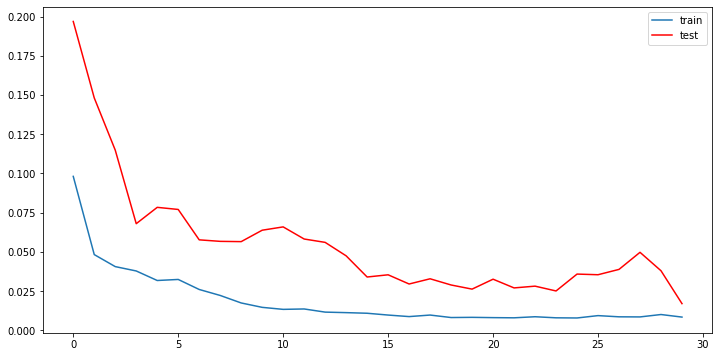

In [51]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test', color='red')
plt.legend()
plt.show()

### infer model on test data

In [52]:
from sklearn.metrics import mean_squared_error

# make a prediction
print(test_X.shape)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[2]))
print(test_X.shape)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(6000, 1, 12)
(6000, 1, 12)
188/188 [==============================] - 1s 2ms/step
Test RMSE: 139.150


an rmse of 111 is pretty good when lookin at sensex pas price values